In [2]:
import pandas as pd
import numpy as np

In [3]:
ctd = pd.read_csv('2019-Nov.csv')

In [4]:

print(ctd.shape)
print(ctd.head())

(67501979, 9)
                event_time event_type  product_id          category_id  \
0  2019-11-01 00:00:00 UTC       view     1003461  2053013555631882655   
1  2019-11-01 00:00:00 UTC       view     5000088  2053013566100866035   
2  2019-11-01 00:00:01 UTC       view    17302664  2053013553853497655   
3  2019-11-01 00:00:01 UTC       view     3601530  2053013563810775923   
4  2019-11-01 00:00:01 UTC       view     1004775  2053013555631882655   

               category_code   brand   price    user_id  \
0     electronics.smartphone  xiaomi  489.07  520088904   
1  appliances.sewing_machine  janome  293.65  530496790   
2                        NaN   creed   28.31  561587266   
3  appliances.kitchen.washer      lg  712.87  518085591   
4     electronics.smartphone  xiaomi  183.27  558856683   

                           user_session  
0  4d3b30da-a5e4-49df-b1a8-ba5943f1dd33  
1  8e5f4f83-366c-4f70-860e-ca7417414283  
2  755422e7-9040-477b-9bd2-6a6e8fd97387  
3  3bfb58cd-7892-4

In [5]:
ctd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67501979 entries, 0 to 67501978
Data columns (total 9 columns):
event_time       object
event_type       object
product_id       int64
category_id      int64
category_code    object
brand            object
price            float64
user_id          int64
user_session     object
dtypes: float64(1), int64(3), object(5)
memory usage: 4.5+ GB


In [6]:
ctd.isnull().sum()

event_time              0
event_type              0
product_id              0
category_id             0
category_code    21898171
brand             9224078
price                   0
user_id                 0
user_session           10
dtype: int64

In [7]:
ctd = ctd.drop_duplicates()

In [8]:
ctd.shape

(67401460, 9)

In [9]:
ctd.head()


,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-11-01 00:00:00 UTC,view,1003461,2053013555631882655,electronics.smartphone,xiaomi,489.07,520088904,4d3b30da-a5e4-49df-b1a8-ba5943f1dd33
1,2019-11-01 00:00:00 UTC,view,5000088,2053013566100866035,appliances.sewing_machine,janome,293.65,530496790,8e5f4f83-366c-4f70-860e-ca7417414283
2,2019-11-01 00:00:01 UTC,view,17302664,2053013553853497655,NaN,creed,28.31,561587266,755422e7-9040-477b-9bd2-6a6e8fd97387
3,2019-11-01 00:00:01 UTC,view,3601530,2053013563810775923,appliances.kitchen.washer,lg,712.87,518085591,3bfb58cd-7892-48cc-8020-2f17e6de6e7f
4,2019-11-01 00:00:01 UTC,view,1004775,2053013555631882655,electronics.smartphone,xiaomi,183.27,558856683,313628f1-68b8-460d-84f6-cec7a8796ef2


In [11]:
ctd= ctd[(ctd['event_type']=='purchase')]

In [12]:
ctd.shape

(916930, 9)

In [21]:
ctd=ctd.drop(['product_id', 'category_id', 'category_code','brand','user_session'], axis=1)

In [19]:
import datetime
ctd['event_time'] = pd.to_datetime(ctd['event_time']).dt.date

In [22]:
ctd.head()

,event_time,event_type,price,user_id
107,2019-11-01,purchase,566.30,559368633
168,2019-11-01,purchase,211.92,513351129
707,2019-11-01,purchase,128.42,562958505
811,2019-11-01,purchase,109.66,541854711
939,2019-11-01,purchase,488.80,557746614


In [23]:
ctd_merge = ctd.groupby(['user_id','event_time']).agg({'price': 'sum'})

In [24]:
ctd_merge.head()

,,price
user_id,event_time,
138340325,2019-11-11,93.50
225644257,2019-11-12,40.91
253299396,2019-11-06,246.85
256164170,2019-11-20,113.23
267316896,2019-11-14,189.71


In [25]:
ctd_merge=ctd_merge.reset_index()

In [26]:
ctd_merge.head()

,user_id,event_time,price
0,138340325,2019-11-11,93.50
1,225644257,2019-11-12,40.91
2,253299396,2019-11-06,246.85
3,256164170,2019-11-20,113.23
4,267316896,2019-11-14,189.71


In [172]:
ctd_merge.to_csv('Customer_transactions_agg')

In [27]:
print('Min:{}; Max:{}'.format(ctd_merge["event_time"].min(), ctd_merge["event_time"].max()))

Min:2019-11-01; Max:2019-11-30


In [31]:
ctd_merge = ctd_merge[ (ctd_merge['event_time']>'2012-01-02') & (ctd_merge['date'] < '2013-01-03')]

TypeError: '>' not supported between instances of 'datetime.date' and 'str'

In [32]:
ctd_merge.head()

,user_id,event_time,price
0,138340325,2019-11-11,93.50
1,225644257,2019-11-12,40.91
2,253299396,2019-11-06,246.85
3,256164170,2019-11-20,113.23
4,267316896,2019-11-14,189.71


In [36]:
import datetime as dt
current_date = dt.datetime(2019,11,30)
current_date
print(ctd_merge.event_time.dtype)
ctd_merge['event_time'] = pd.to_datetime(ctd_merge['event_time'])
print(ctd_merge.event_time.dtype)

datetime64[ns]
datetime64[ns]


In [37]:
ctd_merge = ctd_merge.groupby(['user_id']).agg({ 'event_time': lambda x: (current_date - x.max()).days, 'user_id': 'count',
'price': 'sum'})

In [38]:
ctd_merge.head()

,event_time,user_id,price
user_id,,,
138340325,19,1,93.50
225644257,18,1,40.91
253299396,24,1,246.85
256164170,10,1,113.23
267316896,16,1,189.71


In [39]:
ctd_merge.tail()

,event_time,user_id,price
user_id,,,
579962677,0,1,1634.38
579963523,0,1,457.91
579964521,0,1,334.60
579966375,0,1,124.11
579967058,0,1,124.11


In [40]:
ctd_merge.rename(columns = {'event_time': 'Recency', 'user_id': 'Frequency','price': 'Monetary'}, inplace=True)

In [41]:
ctd_merge=ctd_merge.reset_index()

In [42]:
ctd_merge.head()

,user_id,Recency,Frequency,Monetary
0,138340325,19,1,93.50
1,225644257,18,1,40.91
2,253299396,24,1,246.85
3,256164170,10,1,113.23
4,267316896,16,1,189.71


In [44]:
ctd_merge['Rank_recency_dense'] = ctd_merge.Recency.rank(method='dense').astype(int)
ctd_merge['Rank_freq_dense']= ctd_merge.Frequency.rank(method= 'dense',ascending=False ).astype(int)
ctd_merge['Rank_monetary_dense']=ctd_merge.Monetary.rank(method='dense',ascending=False).astype(int)

In [45]:
ctd_merge.head()

,user_id,Recency,Frequency,Monetary,Rank_recency_dense,Rank_freq_dense,Rank_monetary_dense
0,138340325,19,1,93.50,19,29,107411
1,225644257,18,1,40.91,18,29,112005
2,253299396,24,1,246.85,24,29,93981
3,256164170,10,1,113.23,11,29,105630
4,267316896,16,1,189.71,16,29,99103


In [46]:

ctd_merge['rfm_score']= ((ctd_merge['Rank_recency_dense'] + ctd_merge['Rank_freq_dense']+ctd_merge['Rank_monetary_dense'])/3).astype(int)

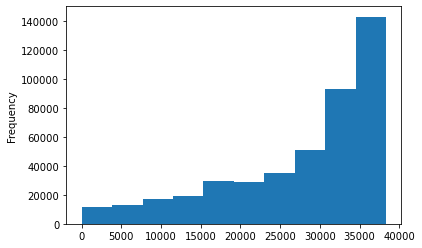

In [48]:
import matplotlib.pyplot as plt
ctd_merge['rfm_score'].plot(kind='hist')

In [49]:
criteria = [ctd_merge['rfm_score'].between(0, 5000), ctd_merge['rfm_score'].between(5001, 15000), ctd_merge['rfm_score'].between(15001, 25000),ctd_merge['rfm_score'].between(25001, 35000), ctd_merge['rfm_score'].between(35001,45000)]
values = [1, 2, 3, 4,5]

ctd_merge['rfm_rank'] = np.select(criteria, values, 5)

In [50]:
ctd_merge.head()

,user_id,Recency,Frequency,Monetary,Rank_recency_dense,Rank_freq_dense,Rank_monetary_dense,rfm_score,rfm_rank
0,138340325,19,1,93.50,19,29,107411,35819,5
1,225644257,18,1,40.91,18,29,112005,37350,5
2,253299396,24,1,246.85,24,29,93981,31344,4
3,256164170,10,1,113.23,11,29,105630,35223,5
4,267316896,16,1,189.71,16,29,99103,33049,4


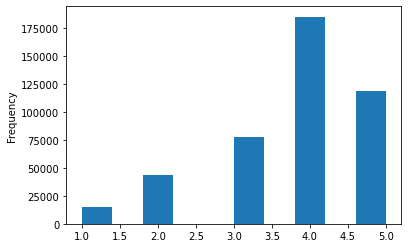

In [51]:

ctd_merge['rfm_rank'].plot(kind='hist')

In [57]:

ctd_merge['user_id'].nunique()

441638

In [52]:
ctd_merge.to_csv('RFM_SCORE.csv')